In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("https://storage.googleapis.com/kagglesdsdata/datasets%2F34879%2F46976%2F500_Person_Gender_Height_Weight_Index.csv?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1596208094&Signature=lhDA1pDFDQCJaUv21BarS5ugB8KkjDT1OxpVO6qjLYqCayBueAMYNNBYMD8nYdTq%2FH1T%2FAF3ZY6%2BAEaX%2F6LYad7NkY2UjwFEsYHUuojuVS3RVz5u43GqfMgjyL9fS56EqkwDf5qKks2tyD41UqvS92Zrmiv0PrkFGs9HRbpjgcXUAgwerlTd0V%2Besxln4DRlJMf1EJCtkmeVdRKmLdJ6ZHGgcX9iHyboO3yvCKgtM6BSjGw4E3Z3TwBk2khxhwskG5oxMHYSw%2FFLRcC2kWYWRrmTVYqAR6k7firkcnC2UfLqy8fpvQ2T4bqOH4RhT%2FpqbawHj7TqaiNDvV2pMVMm2Q%3D%3D")

In [4]:
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [5]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [8]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [9]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [10]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [11]:
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])

In [13]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [14]:
bins = (-1,0,1,2,3,4,5)
health = ['malnourished', 'underweight', 'fit', 'slightly overweight', 'overweight', 'extremely overweight']
data['Index'] = pd.cut(data['Index'], bins = bins , labels = health)

In [15]:
data['Index']

0                overweight
1                       fit
2                overweight
3       slightly overweight
4       slightly overweight
               ...         
495    extremely overweight
496              overweight
497    extremely overweight
498    extremely overweight
499    extremely overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): [malnourished < underweight < fit < slightly overweight < overweight < extremely overweight]

In [16]:
data['Index'].value_counts()

extremely overweight    198
overweight              130
fit                      69
slightly overweight      68
underweight              22
malnourished             13
Name: Index, dtype: int64

In [18]:
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

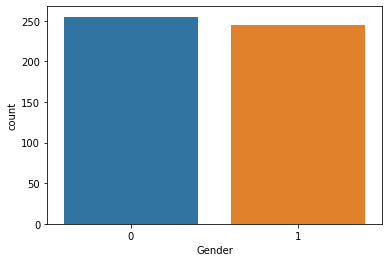

In [20]:
sns.countplot(data['Gender'])

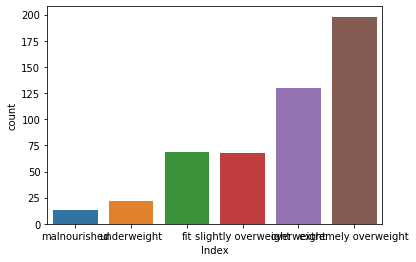

In [21]:
sns.countplot(data['Index'])

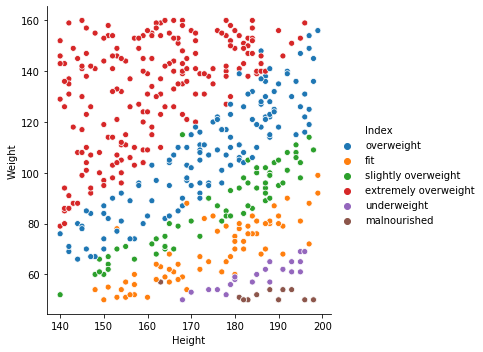

In [22]:
sns.relplot(x='Height', y='Weight', hue="Index", data=data)

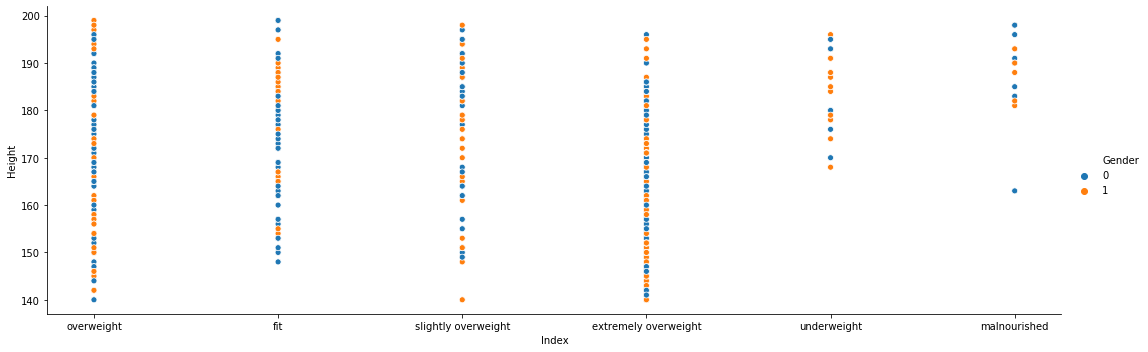

In [25]:
sns.relplot(x='Index', y='Height', hue="Gender", data = data, height = 5, aspect= 3)

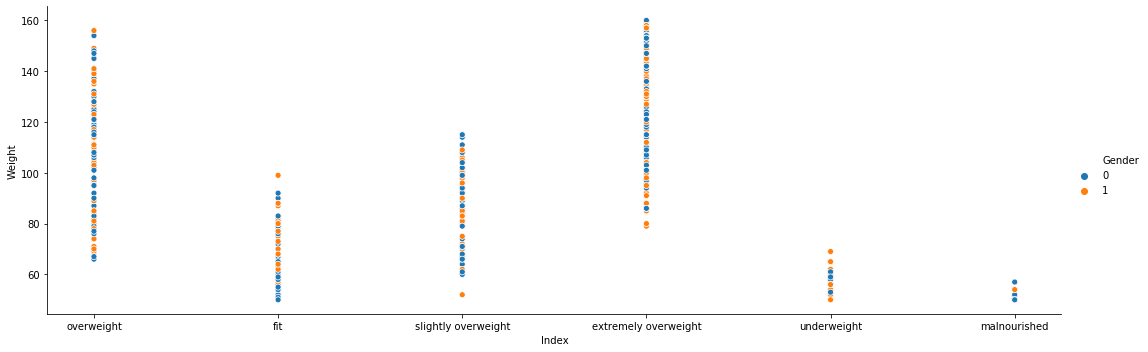

In [26]:
sns.relplot(x='Index', y='Weight', hue="Gender", data = data, height = 5, aspect= 3)

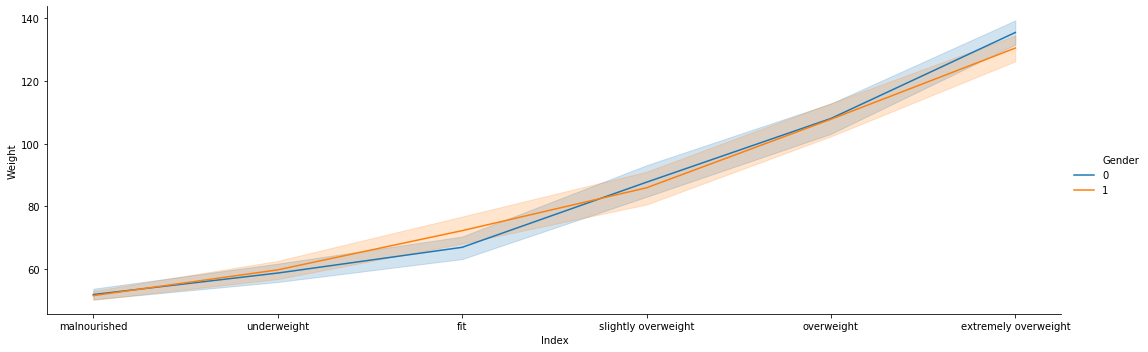

In [27]:
 sns.relplot(x='Index', y='Weight', hue="Gender",kind='line', data = data, height = 5, aspect= 3)

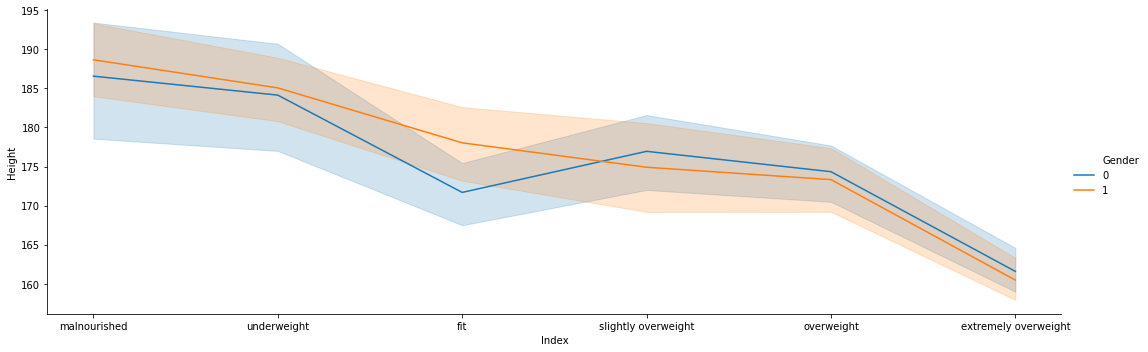

In [28]:
sns.relplot(x='Index', y='Height', hue="Gender",kind='line', data = data, height = 5, aspect= 3)

In [29]:
x = data.drop('Index', axis=1)
y = data['Index']

In [31]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2 , random_state = 0)

In [32]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [33]:
clf = svm.SVC()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

In [36]:
print(classification_report(y_test, pred))

                      precision    recall  f1-score   support

extremely overweight       0.88      0.97      0.92        36
                 fit       0.73      0.80      0.76        10
        malnourished       0.00      0.00      0.00         3
          overweight       0.96      0.78      0.86        32
 slightly overweight       0.78      0.93      0.85        15
         underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100



In [37]:
print(confusion_matrix(y_test, pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [38]:
print(accuracy_score(y_test, pred))

0.85


In [44]:
a = [[0,185,110]]
a = s.transform(a)
b = clf.predict(a)

In [45]:
b

array(['overweight'], dtype=object)

In [41]:
data

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight
...,...,...,...,...
495,0,150,153,extremely overweight
496,0,184,121,overweight
497,0,141,136,extremely overweight
498,1,150,95,extremely overweight
